<img src="../../images/brownbear.png" width="400">

## A financial tool that can analyze and maximize investment portfolios on a risk adjusted basis  


Description: This notebook is useful for examining potfolios comprised of stocks from the 'total market' which we define as sp500, sp400, nasdaq100, and dow30.  Construct portfolios from the 'total market' and examine the results of different weighting schemes.


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import brownbear as bb

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# display all rows
pd.set_option('display.max_rows', None)

# do not truncate column names
pd.set_option('display.max_colwidth', None)

%matplotlib inline

In [3]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### Some Globals

In [4]:
investment_universe = ['sp500-galaxy', 'sp400-galaxy', 'nasdaq100-galaxy', 'dow30-galaxy']
risk_free_rate = 0
annual_returns = '3 Yr'
vola = 'Vola'
ds_vola = 'DS Vola'

In [5]:
# Fetch Investment Options - all values annualized
df = bb.fetch(investment_universe, risk_free_rate, annual_returns, vola, ds_vola)
df

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
0,MMM,3M,US Stocks:Industrials,-25.29,-15.88,45.14,-0.36,1.44,16.30,8.97,30.93,-0.36,-11.13
1,AOS,A. O. Smith,US Stocks:Industrials,-71.02,-65.16,-15.99,-6.13,9.15,14.86,11.29,30.03,-6.13,-184.08
2,ABT,Abbott Laboratories,US Stocks:Healthcare,-29.62,1.18,5.33,-5.28,7.36,11.98,8.13,18.06,-5.28,-95.36
3,ABBV,AbbVie,US Stocks:Healthcare,-14.34,-28.68,16.38,14.10,20.23,19.34,10.67,21.67,14.10,0.65
4,ACN,Accenture,US Stocks:Technology,-34.59,-6.62,2.16,-4.22,12.25,31.24,11.84,24.32,-4.22,-102.63
5,ADBE,Adobe Inc.,US Stocks:Technology,-84.88,-42.22,-23.97,-8.16,6.08,53.15,46.94,39.01,-8.16,-318.32
6,AMD,Advanced Micro Devices,US Stocks:Technology,-85.95,-67.51,-12.95,-6.64,21.52,33.59,22.72,52.72,-6.64,-350.06
7,AES,AES Corporation,US Stocks:Utilities,3.75,-80.67,-29.75,-15.35,-5.27,31.05,12.92,42.50,-15.35,-652.38
8,AFL,Aflac,US Stocks:Financials,-63.78,-35.52,25.00,22.96,16.90,14.50,10.91,23.10,22.96,0.99
9,A,Agilent Technologies,US Stocks:Healthcare,-40.46,-30.75,-3.17,-5.31,10.21,18.78,11.07,27.67,-5.31,-146.93


In [6]:
# Rank
#rank = bb.rank(df, rank_by='Sharpe Ratio')
rank = bb.rank(df, rank_by='Sharpe Ratio', group_by='Asset Subclass', num_per_group=2)
rank_filtered = rank
#rank_filtered = rank.loc[(rank['3 mo'] > 0) & rank['1 Yr'] > 0]
rank_filtered

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
122,CEG,Constellation Energy,US Stocks:Utilities,-28.85,-30.16,111.63,111.63,111.63,42.78,23.49,38.74,111.63,2.88
473,VST,Vistra Corp.,US Stocks:Utilities,-28.26,104.39,297.08,94.26,49.53,56.09,33.62,43.86,94.26,2.15
189,FICO,Fair Isaac,US Stocks:Technology,-84.56,12.46,76.45,65.58,39.75,29.44,24.44,36.13,65.58,1.82
72,AVGO,Broadcom,US Stocks:Technology,5421.63,245.08,116.61,54.53,53.51,104.98,29.20,38.74,54.53,1.41
259,IRM,Iron Mountain,US Stocks:Real Estate,-81.97,-39.25,56.96,30.75,33.86,32.41,25.88,26.80,30.75,1.15
758,OHI,Omega Healthcare Investors,US Stocks:Real Estate,-45.09,-14.64,32.82,18.75,6.64,14.89,12.27,25.03,18.75,0.75
699,KNF,Knife River Corporation,US Stocks:Materials,-20.70,68.50,56.44,56.44,56.44,37.00,18.30,28.06,56.44,2.01
359,PKG,Packaging Corporation of America,US Stocks:Materials,-60.67,28.29,40.92,22.58,18.71,11.14,8.96,25.05,22.58,0.90
617,EME,Emcor,US Stocks:Industrials,-69.40,28.70,115.66,53.45,40.01,25.14,21.79,31.97,53.45,1.67
640,FIX,Comfort Systems USA,US Stocks:Industrials,-79.77,35.02,112.60,63.37,54.54,32.37,27.26,38.89,63.37,1.63


### Sample Portfolios
Format 'Investment option': weight

In [7]:
# everything ranked
ranked_portfolio = {
    'Title': 'Ranked Portfolio'
}
everything = list(rank_filtered['Investment Option'])
ranked_portfolio.update(dict.fromkeys(everything, 1/len(everything)))

# top 10
top10_portfolio = {
    'Title': 'Ranked Portfolio'
}
top10 = list(rank_filtered['Investment Option'])[:10]
top10_portfolio.update(dict.fromkeys(top10, 1/len(top10)))

### Custom Portfolios

In [8]:
# My portfolio
my_portfolio = {
    'Title': 'My Portfolio',

}

### Choose Portfolio Option

In [9]:
# Select one of the portfolios from above
portfolio_option = ranked_portfolio

In [10]:
# Make a copy so that the original portfolio is preserved
portfolio_option = portfolio_option.copy()

### Analysis Options

In [11]:
# Specify the weighting scheme.  It will replace the weights specified in the portfolio
# You can also fix the weights on some Investent Options, Asset Classes, and Asset Subclasses
# while the others are automatically calculated.

# 'Equal' - will use equal weights.

# 'Sharpe Ratio' - will use proportionally weighted # allocations based on the percent
#  of an investment option's sharpe ratio to the sum of all the sharpe ratios in the portfolio.

# 'Std Dev' - will use standard deviation adjusted weights

# 'Annual Returns' - will use return adjusted weights

# 'Vola' - will use volatility adjusted weights

# 'DS Vola' - will use downside volatility adjusted weights

# None: 'Investment Option' means use user specified weights
#       'Asset Class' means do not group by Asset Class
#       'Asset Subclass means do not group by Asset Subclass 

weight_by = {
    'Asset Class':       {'weight_by': None},
    'Asset Subclass':    {'weight_by': 'DS Vola'},
    'Investment Option': {'weight_by': 'Annual Returns'},
}
#weight_by = None

In [12]:
bb.DEBUG = False

# Analyze portfolio
annual_ret, std_dev, sharpe_ratio = \
    bb.analyze(df, portfolio_option, weight_by)

,CEG,VST,FICO,AVGO,IRM,OHI,KNF,PKG,EME,FIX,...,DTM,SFM,BRBR,DECK,MUSA,TKO,TMUS,ARM,CCEP,Ranked Portfolio
Annual Returns,111.63,94.26,65.58,54.53,30.75,18.75,56.44,22.58,53.45,63.37,...,34.98,64.17,38.58,49.69,36.13,44.60,23.75,86.01,13.73,54.06
Std Dev,38.74,43.86,36.13,38.74,26.80,25.03,28.06,25.05,31.97,38.89,...,24.06,31.44,29.60,34.53,26.80,30.41,18.95,96.78,20.73,25.37
Sharpe Ratio,2.88,2.15,1.82,1.41,1.15,0.75,2.01,0.90,1.67,1.63,...,1.45,2.04,1.30,1.44,1.35,1.47,1.25,0.89,0.66,2.13
Weight,0.05,0.04,0.04,0.03,0.04,0.02,0.06,0.02,0.04,0.05,...,0.02,0.09,0.05,0.03,0.02,0.05,0.03,0.07,0.01,1.00
Worst Typical Down Year,34.15,6.54,-6.68,-22.95,-22.85,-31.31,0.32,-27.52,-10.49,-14.41,...,-13.14,1.29,-20.62,-19.37,-17.47,-16.22,-14.15,-107.55,-27.73,3.31
Black Swan,-4.59,-37.32,-42.81,-61.69,-49.65,-56.34,-27.74,-52.57,-42.46,-53.30,...,-37.20,-30.15,-50.22,-53.90,-44.27,-46.63,-33.10,-204.33,-48.46,-22.06


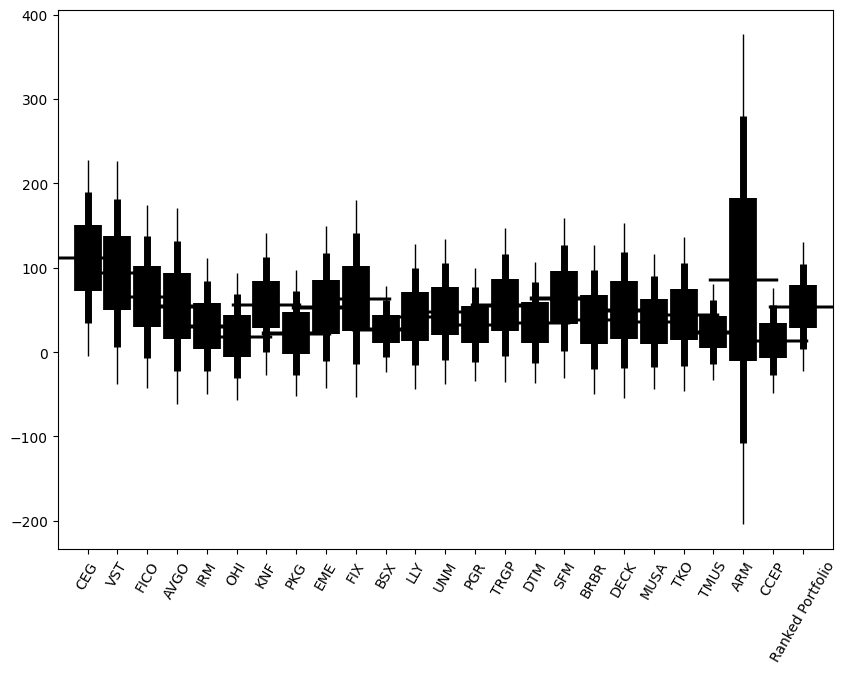

In [13]:
# Display Results
summary = bb.summary(df, portfolio_option, annual_ret, std_dev, sharpe_ratio)
summary

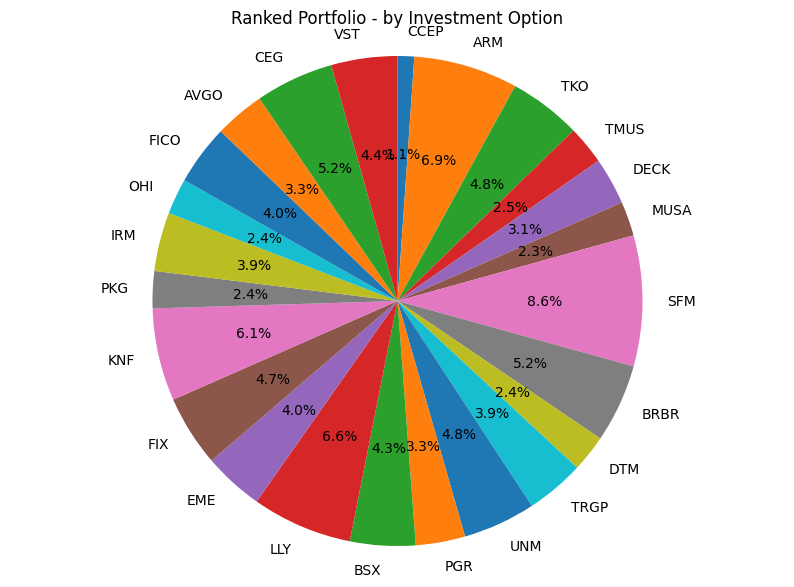

CCEP   0.01
ARM    0.07
TKO    0.05
TMUS   0.03
DECK   0.03
MUSA   0.02
SFM    0.09
BRBR   0.05
DTM    0.02
TRGP   0.04
UNM    0.05
PGR    0.03
BSX    0.04
LLY    0.07
EME    0.04
FIX    0.05
KNF    0.06
PKG    0.02
IRM    0.04
OHI    0.02
FICO   0.04
AVGO   0.03
CEG    0.05
VST    0.04



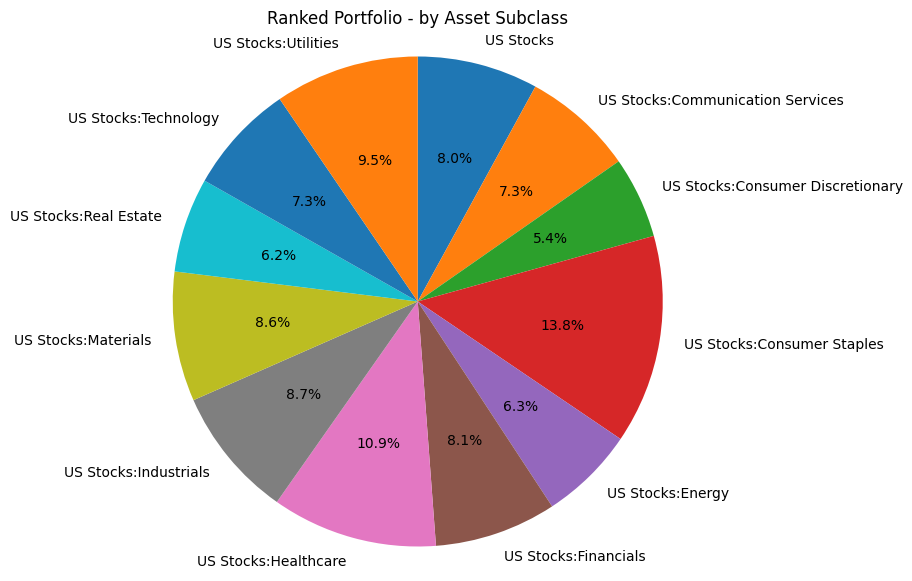

US Stocks                          0.08
US Stocks:Communication Services   0.07
US Stocks:Consumer Discretionary   0.05
US Stocks:Consumer Staples         0.14
US Stocks:Energy                   0.06
US Stocks:Financials               0.08
US Stocks:Healthcare               0.11
US Stocks:Industrials              0.09
US Stocks:Materials                0.09
US Stocks:Real Estate              0.06
US Stocks:Technology               0.07
US Stocks:Utilities                0.10



In [14]:
# Show pie charts of investment and asset class weights
bb.show_pie_charts(df, portfolio_option, charts=['Investment Option', 'Asset Subclass'])

In [15]:
# Show exact weights
bb.print_portfolio(portfolio_option)

Ranked Portfolio Weights:
    CEG                            0.0516
    VST                            0.0436
    FICO                           0.0397
    AVGO                           0.0330
    IRM                            0.0388
    OHI                            0.0237
    KNF                            0.0611
    PKG                            0.0245
    EME                            0.0396
    FIX                            0.0470
    BSX                            0.0431
    LLY                            0.0662
    UNM                            0.0479
    PGR                            0.0326
    TRGP                           0.0385
    DTM                            0.0242
    SFM                            0.0862
    BRBR                           0.0518
    DECK                           0.0311
    MUSA                           0.0226
    TKO                            0.0478
    TMUS                           0.0255
    ARM                            0.0688
    CCEP

### Optimize Portfolio

In [16]:
# Run_portfolio_optimizer = True will run portfolio optimizer after portfolio analysis is complete
run_portfolio_optimizer = True

In [17]:
# Optimize sharpe ratio while specifying Annual Rate, Worst Typical Down Year,
# and Black Swan.  Setting a constraint to None optimizes absolute Sharpe Ratio
# without regard to that constraint.

'''
constraints = {
    'Annual Return': 12,
    'Worst Typical Down Year': -5,
    'Black Swan': None
}
'''

constraints = {
    'Annual Return': 8,
    'Worst Typical Down Year': None,
    'Black Swan': -40
}

if run_portfolio_optimizer:
    bb.optimizer(df, portfolio_option, constraints)

Running optimizer................

Ranked Portfolio Metrics:          
    max_sharpe_ratio           2.81
    annual_return             54.15
    std_dev                   19.29
    worst typical down year   15.58
    black_swan                -3.71


Ranked Portfolio Weights:
    CEG                            0.1100
    VST                            0.0500
    FICO                           0.0900
    AVGO                           0.0500
    IRM                            0.0000
    OHI                            0.0000
    KNF                            0.0000
    PKG                            0.0000
    EME                            0.0000
    FIX                            0.0000
    BSX                            0.0600
    LLY                            0.0000
    UNM                            0.0500
    PGR                            0.0400
    TRGP                           0.0600
    DTM                            0.1400
    SFM                            0.1000
    BRB

### Use Sharpe Ratio adjusted weights
Recommend that you also try using Sharpe Ratio adjusted weights and compare those results with the Optimized Portflio.  
It tends to produce a higher Annual Return while keeping the allocations more balanced than the Optimizer.  (See 'Analysis Options' section).